# Assignment 1: Descriptive Statistics and Probability Theory

**submitted by Sreekanth Potlabathini(220088993)**

-------------------------------------------------------------------

**Content** 

step 1: Importing libraries & data set 

step 2: Working with the data

step 3: Complete the data- fill missing values

step 4: Understand outliers and see if they can be removed

step 5: Removing duplicates & non-useful data 

step 6: Questions & Answers + Data Analysis results

-------------------------------------------------------------------

step 1: Importing libraries & data set

In [177]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the dataset 'sales.csv file for the analysis
df = pd.read_csv(r'C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\Assignment 1\sales_data.csv')


step 2: Working with the data

In [178]:

# Data is import.
# Understanding the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


From the above, we can see for the 'units sold' the mean and 50% are very near. Hence it is normally distributed and we can use the data for further analysis.

In [179]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


step 3: Complete the data- fill missing values

In [180]:
# filling in the missing values in Product and Region with 'Others'
df['Product']=df['Product'].fillna('Other')
df['Region']=df['Region'].fillna('Other')

In [181]:
df.describe(include='all')

,Product,Region,Price,Units Sold,Sale Date
count,1050,1050,945.000000,946.000000,1050
unique,51,11,NaN,NaN,1000
top,Other,Region_9,NaN,NaN,2022-07-28
freq,103,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


<Axes: >

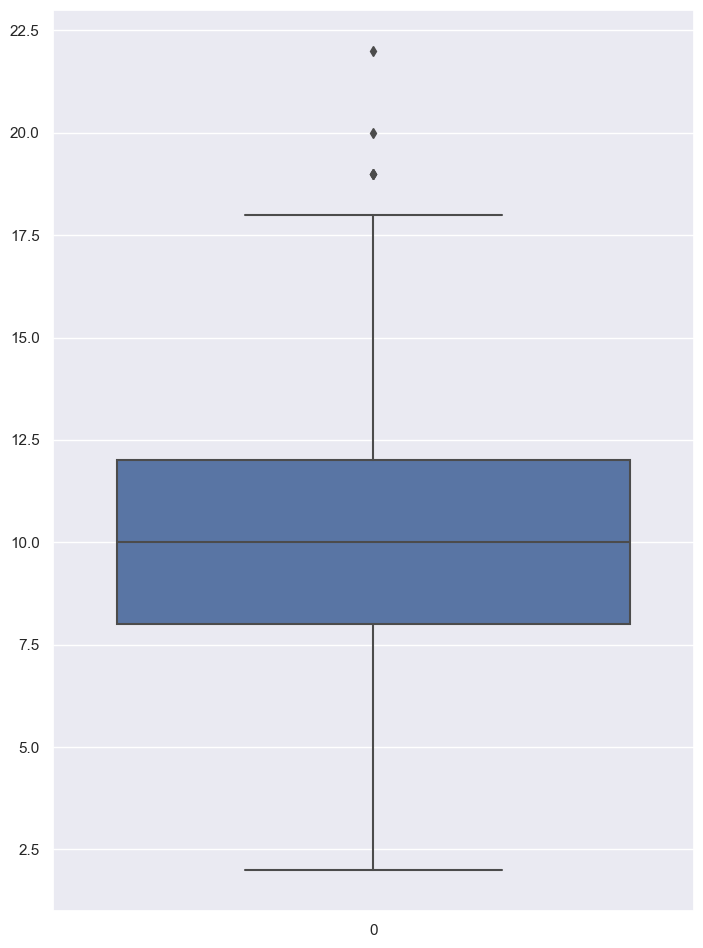

In [182]:
sns.boxplot(df['Units Sold'])

In [183]:
# sales.drop([221,232,719,912,962],axis=0,inplace=True)
# sns.boxplot(df['Units Sold'])

<Axes: xlabel='Units Sold', ylabel='Count'>

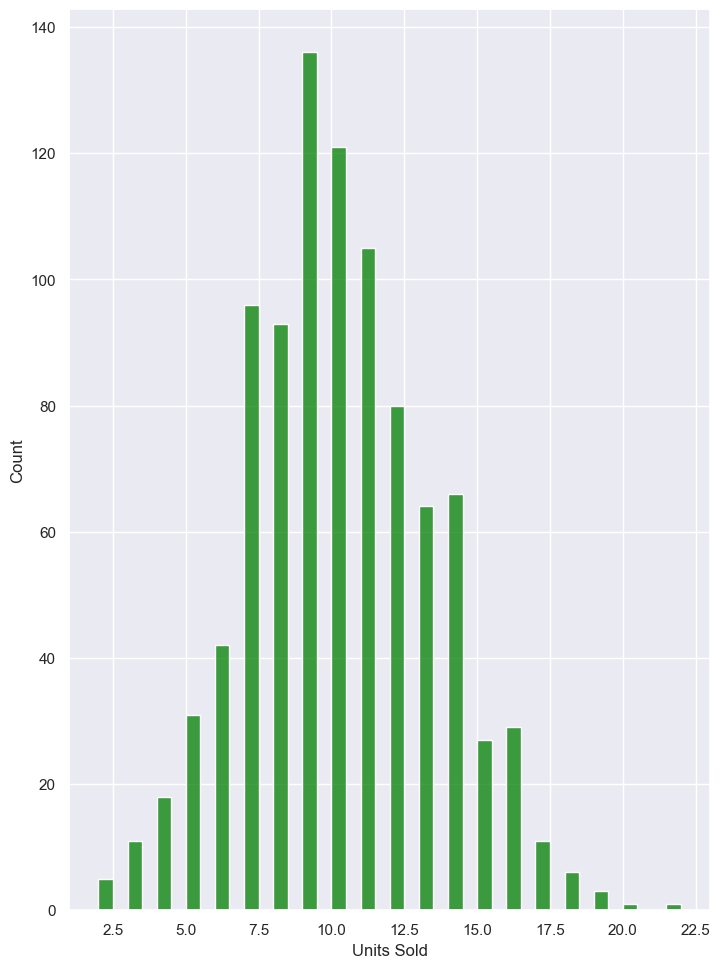

In [184]:
sns.histplot(df['Units Sold'],color='green',bins=40)

step 4: Understand outliers and see if they can be removed

In [185]:
# we can see that almost 100 values are missingf in price and sales
# we can add a mean value of price and sales for missing values but that would cause issue when we run analysis based on Product or region
# hence, the missing  values of price and sales canbe '0' now and look for more info to remove them if they become the outliers.
df['Price']=df['Price'].fillna(0)
df['Units Sold']=df['Units Sold'].fillna(0)
# renaming Units for easy typing
df=df.rename(columns={'Units Sold':'Units'})
df=df.rename(columns={'Sale Date':'Date'})

step 5: Removing duplicates & non-useful data 

In [186]:
# removing the duplicates
df.drop_duplicates(inplace=True)

In [187]:
df.describe(include='all')

,Product,Region,Price,Units,Date
count,1000,1000,1000.000000,1000.000000,1000
unique,51,11,NaN,NaN,1000
top,Other,Region_9,NaN,NaN,2022-01-01
freq,100,104,NaN,NaN,1
mean,NaN,NaN,95.809570,9.061000,NaN
std,NaN,NaN,121.725852,4.260685,NaN
min,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,19.755000,7.000000,NaN
50%,NaN,NaN,64.010000,9.000000,NaN
75%,NaN,NaN,133.135000,12.000000,NaN


<Axes: xlabel='Units', ylabel='Count'>

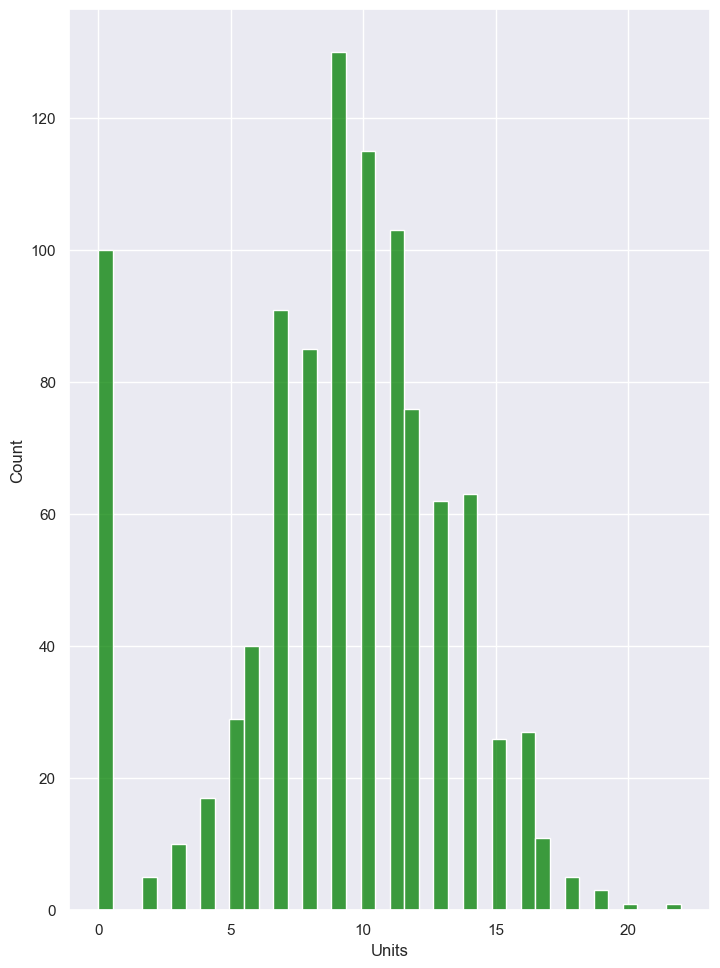

In [188]:
sns.histplot(df['Units'],color='green',bins=40)

<!-- looking at the above graph it isbetter to remove missing values to make it more normally distributed. chances of missing-out on usefull information if all are removed hence we use a copy function to a different dataset to protect information. -->

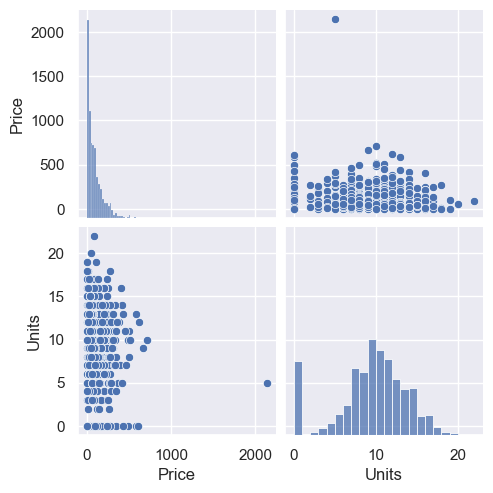

In [189]:
# the data set is full. 
# we need to clean the data for removing outliers for analysis the sales
# we have 51 unique producs as per the info above and 11 Regions
# plotting graphs based the info presented can help us identify the outlier and remove them
sns.pairplot(df)

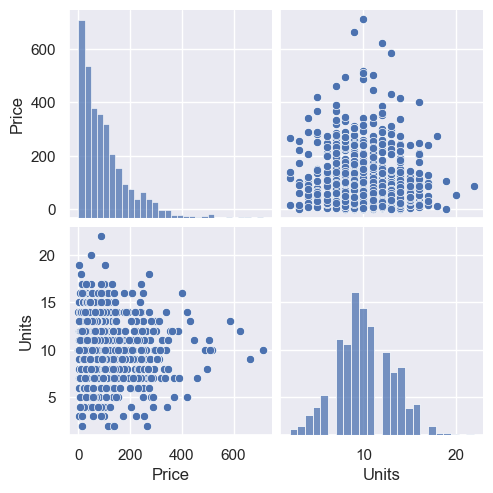

In [190]:
# fromt he aove graph we can see that there is one outlier whose price is greater than 2000
# also there are a lot of unitsold for '0'. 
# we can remove the '0' valve to make it normal distribution
df.drop(df[df['Price']>2000].index,axis=0,inplace=True)
# we can remove the sales which are '0' value but we would loose soem nformation
# create a copy to hold the information
df2 =df.copy()
df2.drop(df2[df2['Units']==0].index,axis=0,inplace=True)
df2.drop(df2[df2['Price']==0].index,axis=0,inplace=True)

sns.pairplot(df2)

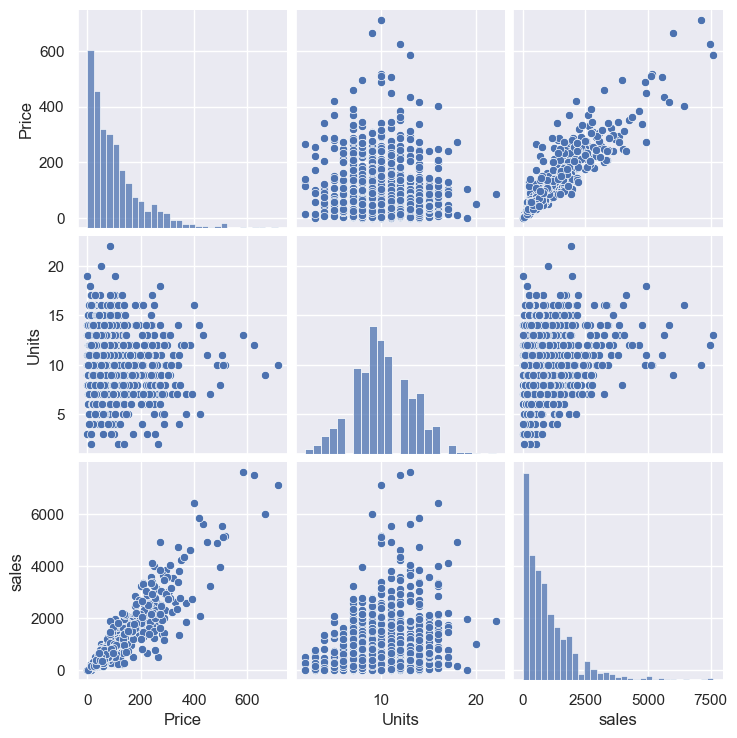

In [191]:
# the data looks better 
# staring the analysis to get information
# creating a vew co.llumn for income earned from selling the product
# Price x Units = sales
df.reset_index(drop=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df2['sales'] = df2['Price']*df2['Units']
df['sales'] = df2['Price']*df2['Units']
sns.pairplot(df2)

<Axes: xlabel='sales', ylabel='Units'>

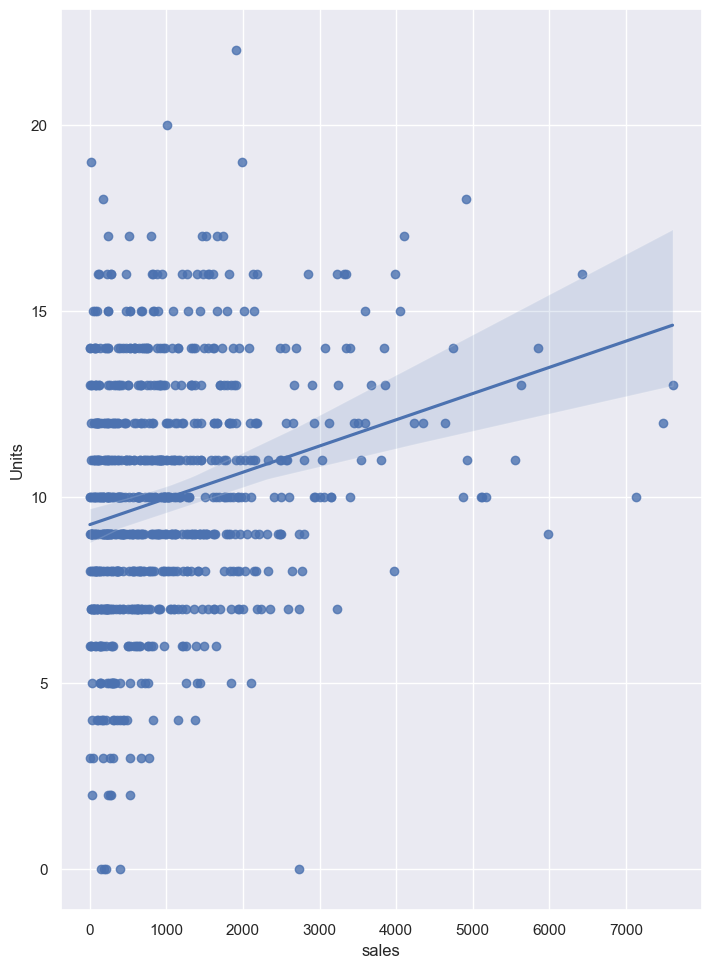

In [192]:
sns.regplot(data = df, x = 'sales', y = 'Units',fit_reg=True,ci=100)

In [193]:
# recommendartion : 
# 1) identify the product to improve or drop (based on sales)
# 2) identify the region to improve or drop (based on sales)

# isolating each graph based on region & Product

dfp = df.groupby('Product')['sales'].sum().reset_index()
dfr = df.groupby('Region')['sales'].sum().reset_index()

<Axes: xlabel='sales', ylabel='Product'>

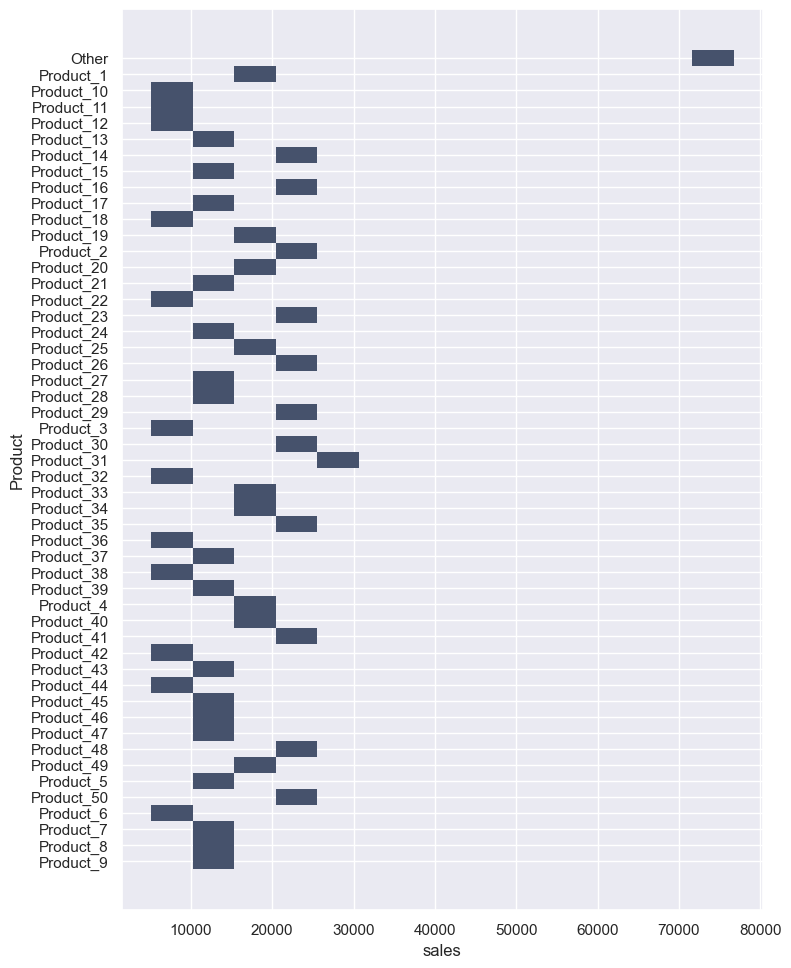

In [194]:
sns.histplot(data=dfp,y='Product',x='sales')

<Axes: xlabel='sales', ylabel='Product'>

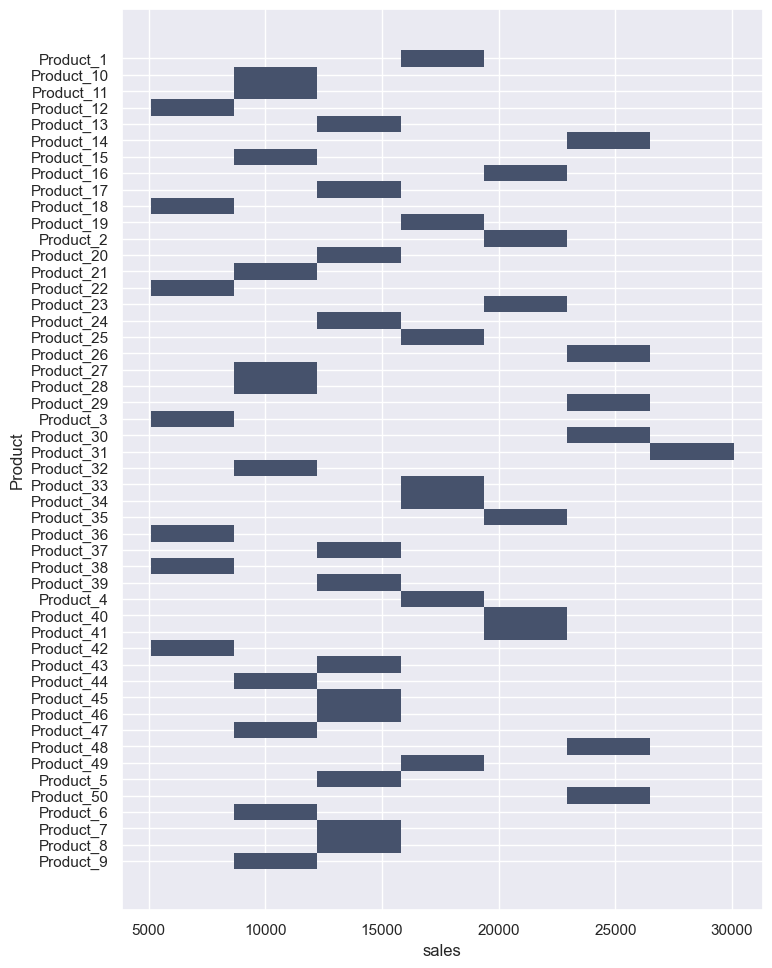

In [195]:
# others is ruining the graph
dfp.drop(dfp[dfp['Product']=='Other'].index,axis=0,inplace=True)
sns.histplot(data=dfp,y='Product',x='sales')

<Axes: xlabel='sales', ylabel='Region'>

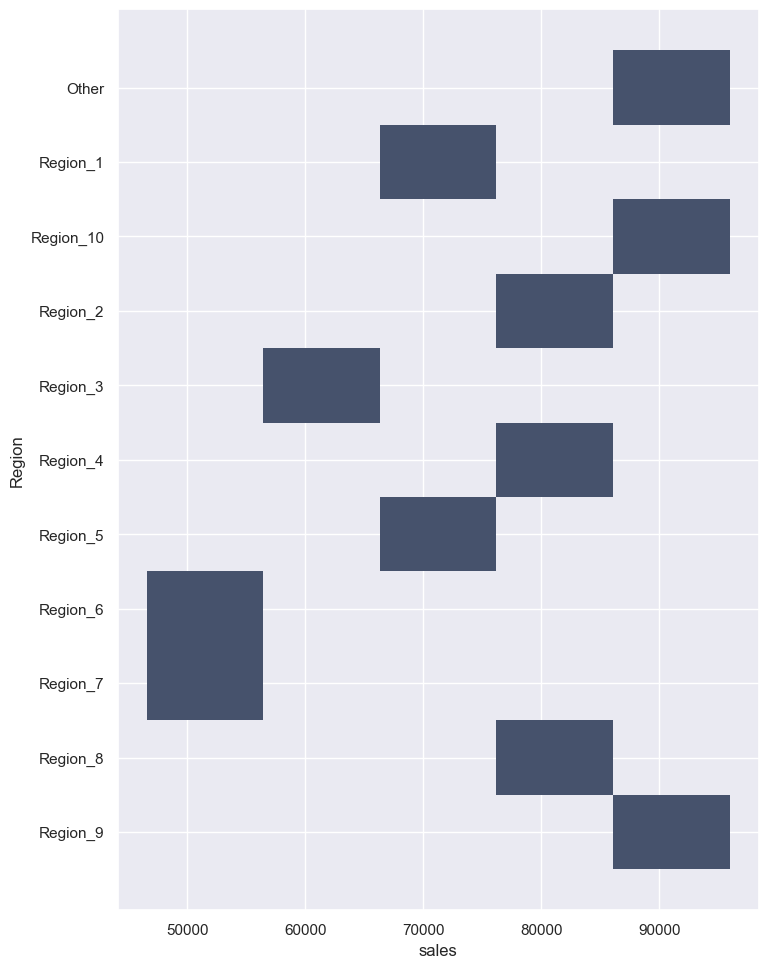

In [196]:
sns.histplot(data=dfr,y='Region',x='sales')

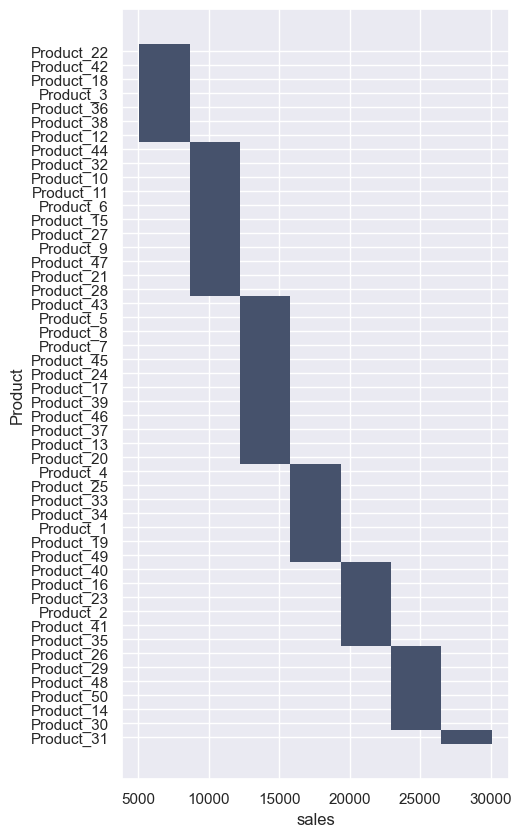

In [197]:
dfp.sort_values('sales', axis=0, ascending=True, inplace=True)
dfr.sort_values('sales', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10), dpi=100)
sns.histplot(data=dfp,y='Product',x='sales')
sns.set(rc={'figure.figsize':(8.27,11.7)})

<Axes: xlabel='sales', ylabel='Region'>

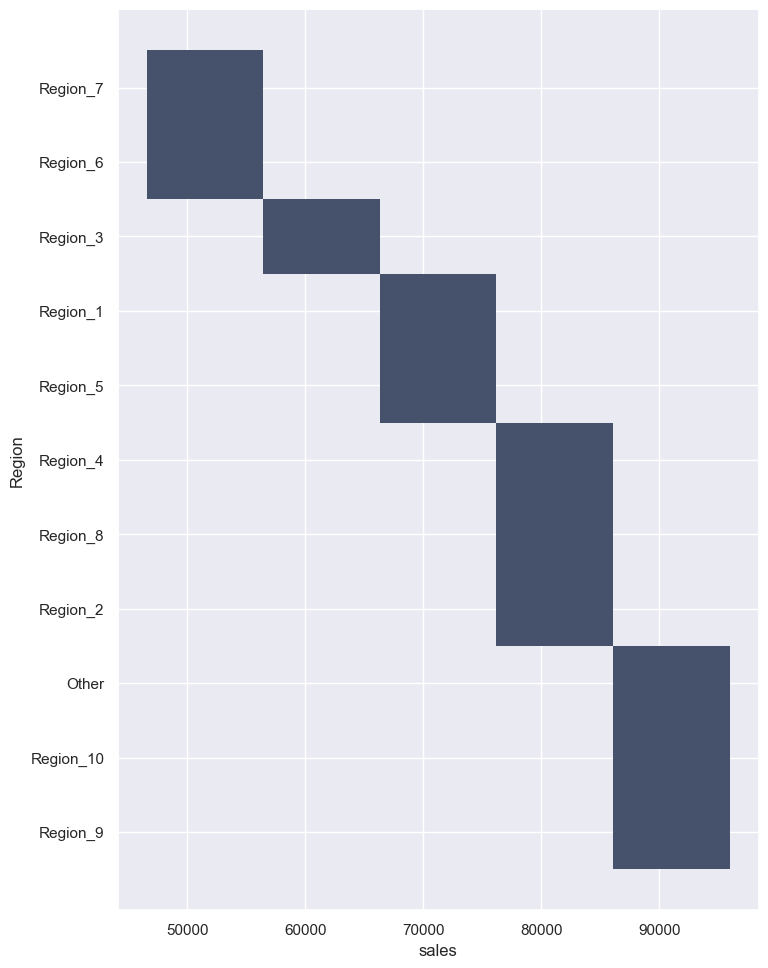

In [198]:
sns.histplot(data=dfr,y='Region',x='sales')

In [199]:
# we can reallocate resources from region 6&7 to conentrate on 9
# We can reallocate resources from Product 22,44,18,3,36,38,12 to conentrate on 26,29,50,48,30,31
# we should also lkook at introducing new products which have higher price since the relation of proiice and sales are co-related


In [200]:
# testing the date info

<Axes: title={'center': 'Monthly Sales Trends'}, xlabel='Month', ylabel='Total Units Sold'>

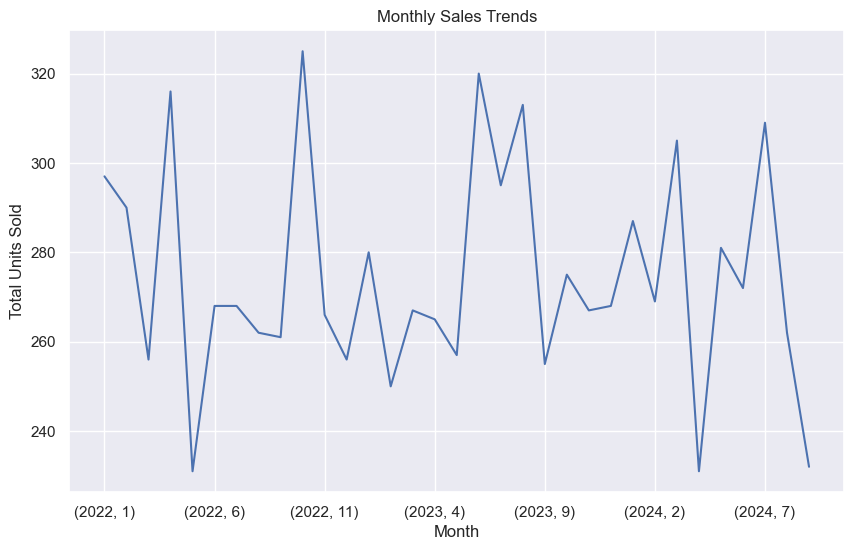

In [201]:
# Extract the year and month from the "Sale Date" column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Calculate total sales volume per month
monthly_sales = df.groupby(['Year', 'Month'])['Units'].sum()

# Plot the sales trends over time
monthly_sales.plot(kind='line', figsize=(10, 6), xlabel='Month', ylabel='Total Units Sold', title='Monthly Sales Trends')

<Axes: title={'center': 'Seasonal Sales Analysis'}, xlabel='Season', ylabel='Total Units Sold'>

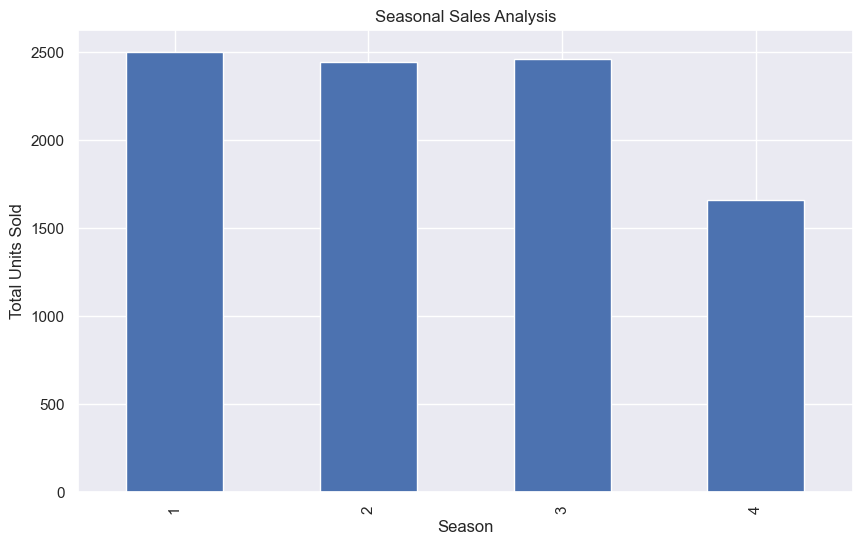

In [202]:
# seasional sales 
# Extract the month and season from the "Sale Date" column
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter

# Calculate total sales volume per season
seasonal_sales = df.groupby('Season')['Units'].sum()

# Plot the seasonal sales analysis
seasonal_sales.plot(kind='bar', figsize=(10, 6), xlabel='Season', ylabel='Total Units Sold', title='Seasonal Sales Analysis')

<Axes: title={'center': 'Sales by Weekday Analysis'}, xlabel='Weekday', ylabel='Total Units Sold'>

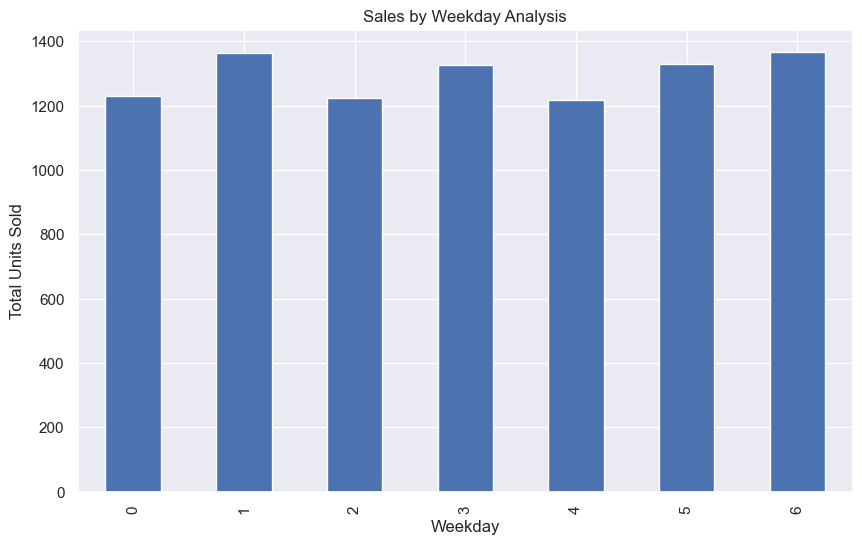

In [203]:
# Extract the weekday from the "Sale Date" column
df['Weekday'] = df['Date'].dt.weekday

# Calculate total sales volume per weekday
weekday_sales = df.groupby('Weekday')['Units'].sum()

# Plot the sales by weekday analysis
weekday_sales.plot(kind='bar', figsize=(10, 6), xlabel='Weekday', ylabel='Total Units Sold', title='Sales by Weekday Analysis')

<Axes: title={'center': 'Sales by Month and Year Analysis'}, xlabel='Month', ylabel='Total Units Sold'>

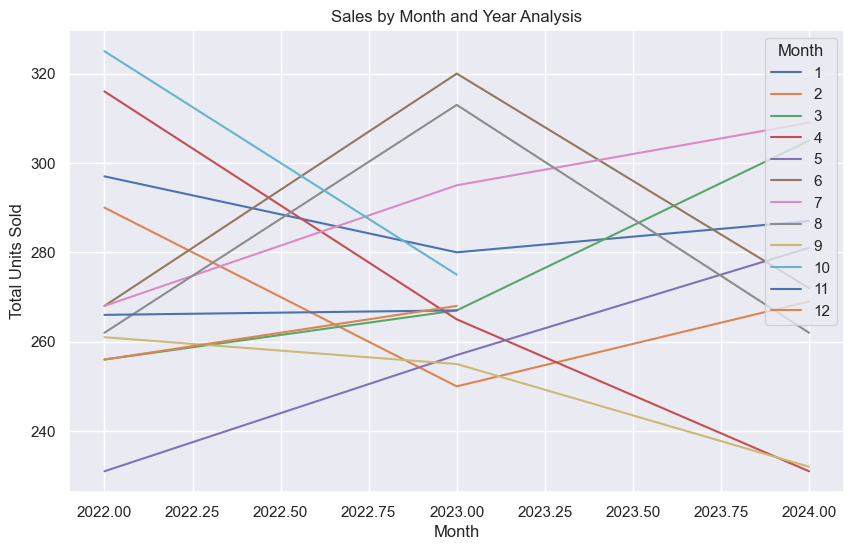

In [204]:
# Extract the month and year from the "Sale Date" column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calculate total sales volume per month and year
monthly_yearly_sales = df.groupby(['Year', 'Month'])['Units'].sum()

# Plot the sales by month and year analysis
monthly_yearly_sales.unstack().plot(kind='line', figsize=(10, 6), xlabel='Month', ylabel='Total Units Sold', title='Sales by Month and Year Analysis')

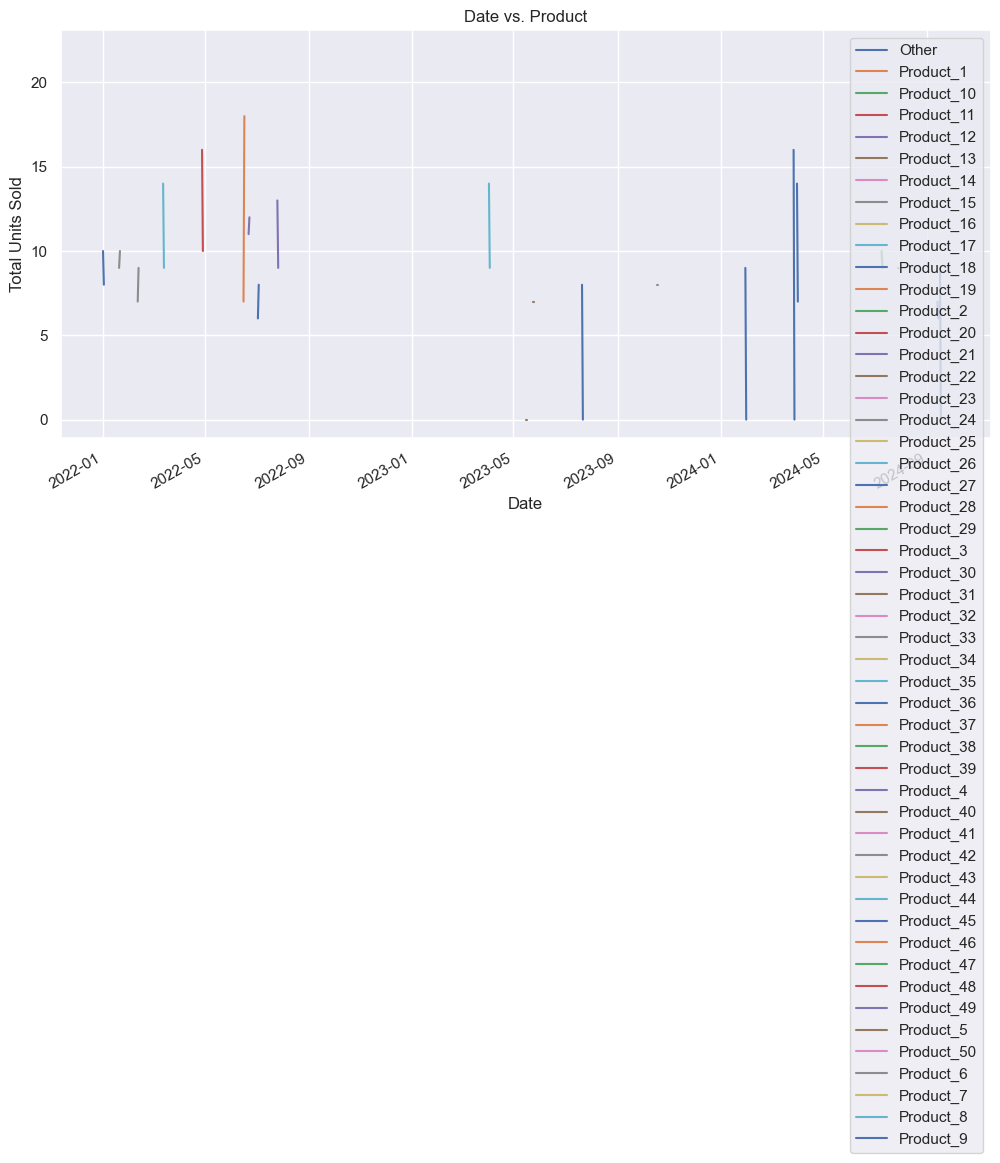

In [205]:
# Group the data by Sale Date and Product and calculate the total units sold
sales_product = df.groupby(['Date', 'Product'])['Units'].sum().unstack()

# Plot the line chart for each product
sales_product.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Date vs. Product')
plt.legend(loc='best')
plt.show()

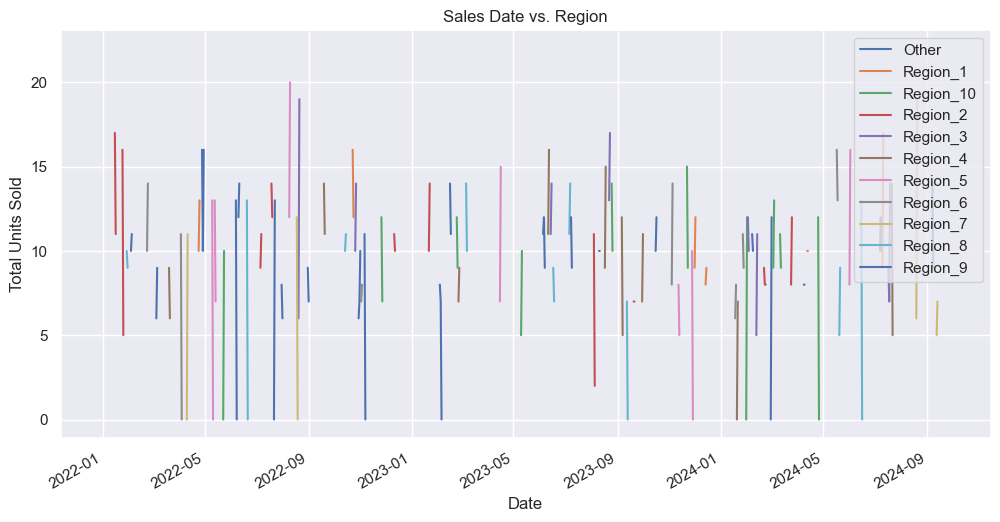

In [206]:
# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Plot the line chart for each region
sales_region.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Sales Date vs. Region')
plt.legend(loc='best')
plt.show()

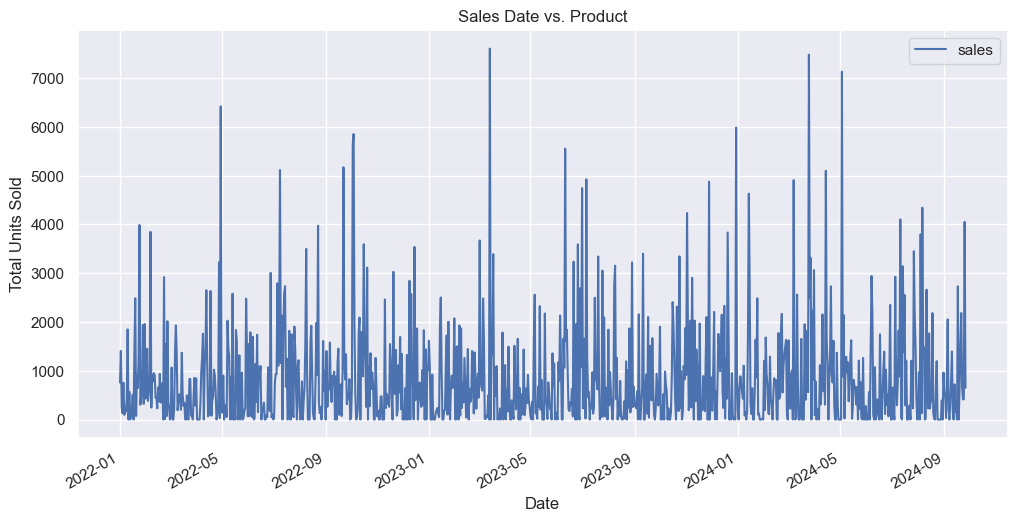

In [207]:

# Group the data by Sale Date and Product and calculate the total units sold
sales_product = df.groupby(['Date'])['sales'].sum()

# Plot the line chart for each product
sales_product.plot(kind='line', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.title('Sales Date vs. Product')
plt.legend(loc='best')
plt.show()

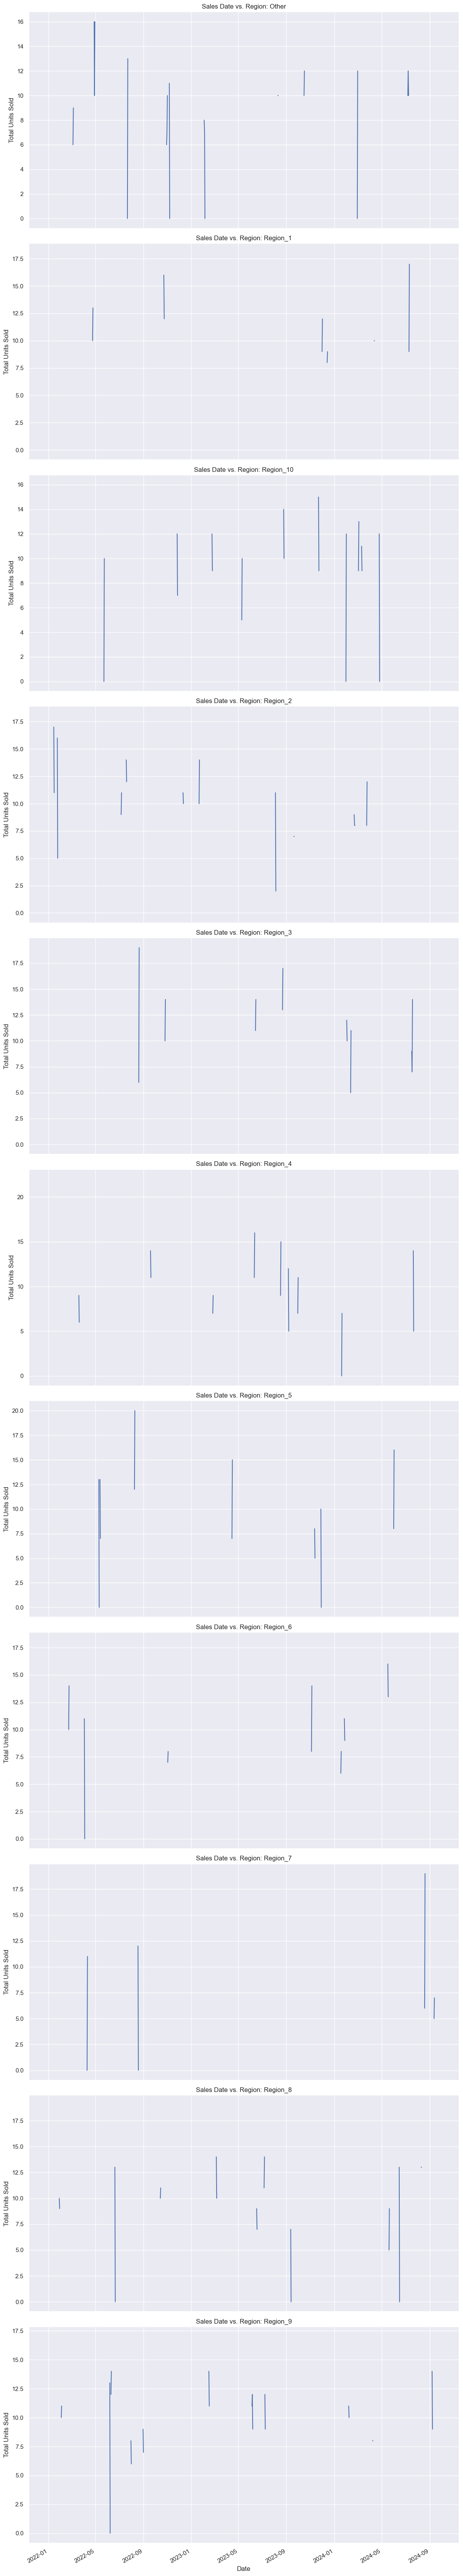

In [208]:

# Group the data by Sale Date and Region and calculate the total units sold
sales_region = df.groupby(['Date', 'Region'])['Units'].sum().unstack()

# Get a list of unique regions
regions = sales_region.columns

# Create subplots for each region
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=True)

# Plot a line chart for each region
for i, region in enumerate(regions):
    sales_region[region].plot(kind='line', ax=axes[i])
    axes[i].set_ylabel('Total Units Sold')
    axes[i].set_title('Sales Date vs. Region: ' + region)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

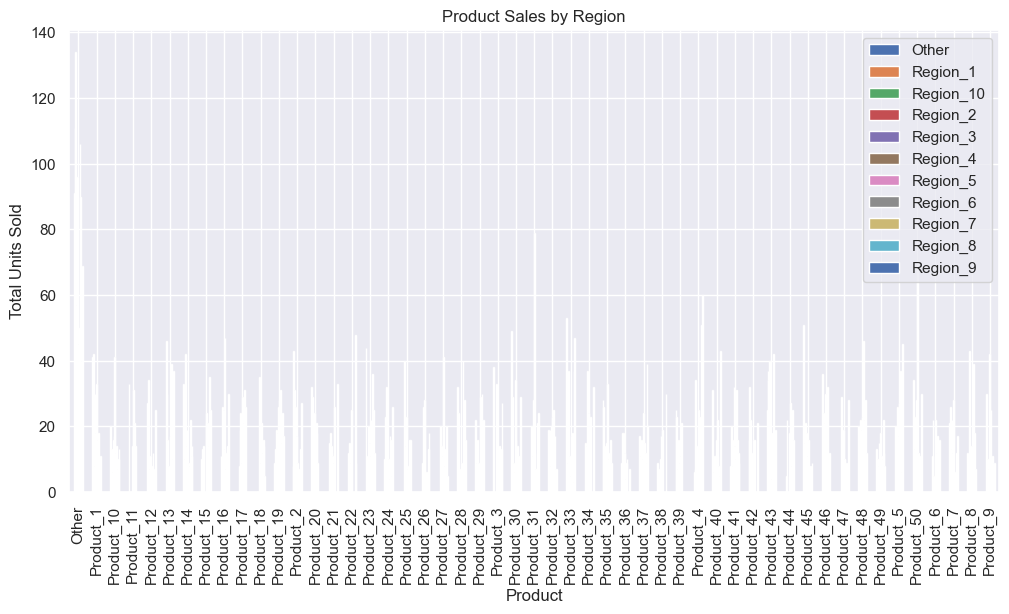

In [209]:

# Group the data by Product and Region and calculate the total units sold
sales_region_product = df.groupby(['Product', 'Region'])['Units'].sum().unstack()

# Plot the bar chart
sales_region_product.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Total Units Sold')
plt.title('Product Sales by Region')
plt.legend(loc='best')
plt.show()

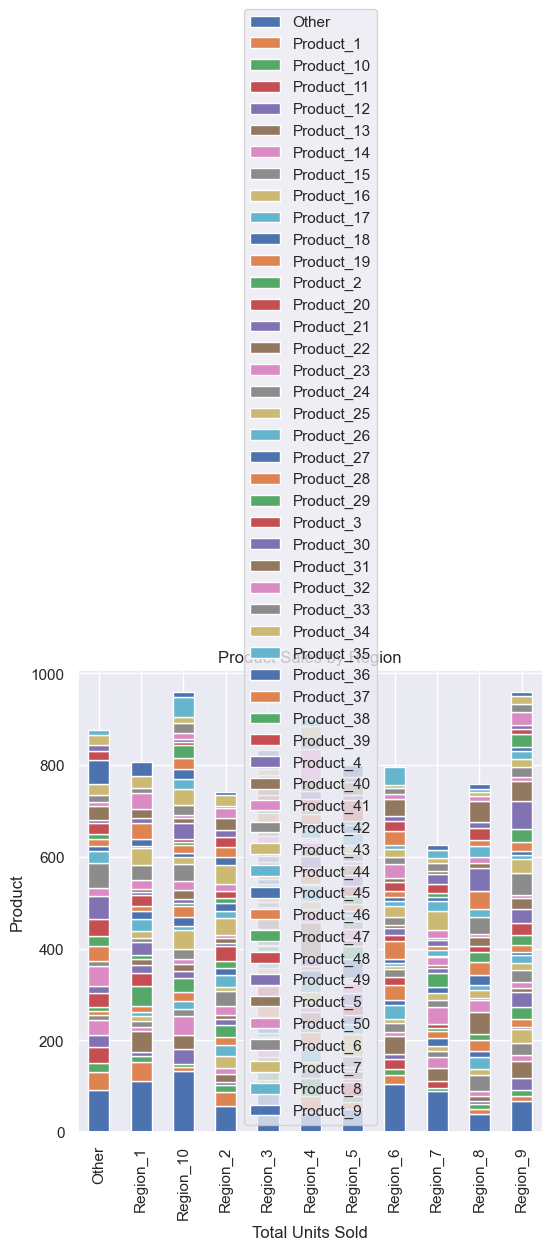

In [210]:

# Group the data by Product and Region and calculate the total units sold
sales_region_product = df.groupby(['Region','Product'])['Units'].sum().unstack()

# Plot the stacked bar chart
sales_region_product.plot(kind='bar', stacked=True, figsize=(6, 6))
plt.ylabel('Product')
plt.xlabel('Total Units Sold')
plt.title('Product Sales by Region')
plt.legend(loc='best')
plt.show()

In [211]:
df[(df['Units']<=3) & (df['sales']<=1000)]

,Product,Region,Price,Units,Date,sales,Year,Month,Season,Weekday
124,Product_37,Region_5,100.65,3.0,2022-05-05,301.95,2022,5,2,3
237,Product_13,Region_5,129.81,2.0,2022-08-26,259.62,2022,8,3,4
246,Other,Region_2,223.00,3.0,2022-09-04,669.00,2022,9,3,6
315,Product_5,Region_3,264.72,2.0,2022-11-12,529.44,2022,11,4,5
397,Product_10,Region_9,0.33,3.0,2023-02-02,0.99,2023,2,1,3
447,Product_3,Region_3,15.05,3.0,2023-03-24,45.15,2023,3,1,4
474,Product_23,Other,173.06,3.0,2023-04-20,519.18,2023,4,2,3
560,Product_33,Region_7,88.69,3.0,2023-07-15,266.07,2023,7,3,5
581,Product_5,Region_2,115.58,2.0,2023-08-05,231.16,2023,8,3,5
660,Product_31,Region_5,58.05,3.0,2023-10-23,174.15,2023,10,4,0


the above information states which products in which region should be dropped due to low sales volume & low sales income

---------------------------------------------------------------------------------

step 6: Questions & Answers + Data Analysis results

1) What conclusions can you draw about sales performance of various products and regions?





2) What recommendations do you have for the business?

we can reallocate resources from region 6 & 7 to concentrate on 9

We can reallocate resources from Product 22, 44, 18, 3, 36, 38 & 12 to conentrate on 26, 29, 50, 48, 30 & 31

we should also look at introducing new products which have higher price since the relation of price and sales are co-related

3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

for data cleaning 